In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
data = pd.read_csv("/content/drive/MyDrive/Phishing/PhishTank/Base_classifier_result(pre HTML cross)(2).csv")
data

,labels,rfc_prediction_non,rfc_prediction_phish,svc_prediction_non,svc_prediction_phish,lr_prediction_non,lr_prediction_phish
0,0,0.997151,0.002849,0.789388,0.210612,0.959679,0.040321
1,0,0.934406,0.065594,0.317019,0.682981,0.496534,0.503466
2,1,0.001440,0.998560,0.500000,0.500000,0.501832,0.498168
3,0,0.949782,0.050218,0.316952,0.683048,0.496137,0.503863
4,0,0.980158,0.019842,0.817363,0.182637,0.753955,0.246045
...,...,...,...,...,...,...,...
4647,0,0.924580,0.075420,0.361246,0.638754,0.762970,0.237030
4648,1,0.018547,0.981453,0.331664,0.668336,0.581115,0.418885
4649,0,0.999946,0.000054,0.775365,0.224635,0.656662,0.343338
4650,0,0.919027,0.080973,0.317551,0.682449,0.492513,0.507487


In [4]:
data.shape

(4652, 7)

In [5]:
data.columns

Index(['labels', 'rfc_prediction_non', 'rfc_prediction_phish',
       'svc_prediction_non', 'svc_prediction_phish', 'lr_prediction_non',
       'lr_prediction_phish'],
      dtype='object')

In [6]:
data.describe()

,labels,rfc_prediction_non,rfc_prediction_phish,svc_prediction_non,svc_prediction_phish,lr_prediction_non,lr_prediction_phish
count,4652.000000,4652.000000,4652.000000,4652.000000,4652.000000,4652.000000,4.652000e+03
mean,0.437016,0.565533,0.434467,0.561066,0.438934,0.627647,3.723526e-01
std,0.496071,0.447135,0.447135,0.211967,0.211967,0.187822,1.878217e-01
min,0.000000,0.000068,0.000054,0.315998,0.055119,0.000255,3.227713e-17
25%,0.000000,0.018314,0.014226,0.332569,0.224635,0.496115,2.671351e-01
50%,0.000000,0.859839,0.140161,0.529720,0.470280,0.523613,4.763868e-01
75%,1.000000,0.985774,0.981686,0.775365,0.667431,0.732865,5.038847e-01
max,1.000000,0.999946,0.999932,0.944881,0.684002,1.000000,9.997453e-01


In [7]:
import numpy as np


y = data['labels'].values
x = np.array(data.drop('labels',axis=1))


print(x.shape, y.shape)

(4652, 6) (4652,)


In [8]:

import keras
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score


def model_aa(x_train, x_val, y_train, y_val, opt, early_stopping_monitor):

  n_cols = x_train.shape[1]
  # print("check point")
  #create model
  model = Sequential()
  model.add(Dense(30, activation='relu', input_shape=(n_cols,)))
  model.add(Dense(10, activation='relu'))

  model.add(Dense(1, activation = 'sigmoid'))
  # softmax
  #compile model using mse as a measure of model performance
  model.compile(optimizer = opt, loss= 'binary_crossentropy', metrics=["accuracy"])

  history = model.fit(x_train, y_train, epochs=100, validation_data=(x_val, y_val), callbacks=[early_stopping_monitor])


  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
  plt.show()


  print('Validation Accuracy: ')
  # Predicting the Test set results
  y_pred = model.predict(x_val)
  y_pred = (y_pred > 0.5)


  print(classification_report(y_val, y_pred))

  # Model Accuracy, how often is the classifier correct?
  print("Accuracy:",metrics.accuracy_score(y_val, y_pred))

  # Creating the Confusion Matrix
  cm = confusion_matrix(y_val, y_pred)
  print(cm)
  print('Precision: %.4f' % precision_score(y_val, y_pred))
  print('Recall: %.4f' % recall_score(y_val, y_pred))
  print('F1 Score: %.4f' % f1_score(y_val, y_pred))
  return metrics.accuracy_score(y_val, y_pred)



Epoch 1/100
131/131 [==============================] - 1s 3ms/step - loss: 0.5712 - accuracy: 0.8266 - val_loss: 0.4255 - val_accuracy: 0.9120
Epoch 2/100
131/131 [==============================] - 0s 2ms/step - loss: 0.3409 - accuracy: 0.9427 - val_loss: 0.2555 - val_accuracy: 0.9506
Epoch 3/100
131/131 [==============================] - 0s 2ms/step - loss: 0.2059 - accuracy: 0.9620 - val_loss: 0.1615 - val_accuracy: 0.9657
Epoch 4/100
131/131 [==============================] - 0s 2ms/step - loss: 0.1382 - accuracy: 0.9663 - val_loss: 0.1234 - val_accuracy: 0.9657
Epoch 5/100
131/131 [==============================] - 0s 2ms/step - loss: 0.1136 - accuracy: 0.9692 - val_loss: 0.1102 - val_accuracy: 0.9678
Epoch 6/100
131/131 [==============================] - 0s 2ms/step - loss: 0.1046 - accuracy: 0.9687 - val_loss: 0.1038 - val_accuracy: 0.9635
Epoch 7/100
131/131 [==============================] - 0s 2ms/step - loss: 0.1003 - accuracy: 0.9697 - val_loss: 0.1006 - val_accuracy: 0.9635

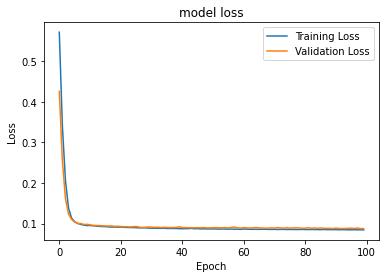

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       278
           1       0.95      0.96      0.96       188

    accuracy                           0.96       466
   macro avg       0.96      0.96      0.96       466
weighted avg       0.96      0.96      0.96       466

Accuracy: 0.9635193133047211
[[268  10]
 [  7 181]]
Precision: 0.9476
Recall: 0.9628
F1 Score: 0.9551
Epoch 1/100
131/131 [==============================] - 1s 3ms/step - loss: 0.3586 - accuracy: 0.9150 - val_loss: 0.1448 - val_accuracy: 0.9721
Epoch 2/100
131/131 [==============================] - 0s 2ms/step - loss: 0.1165 - accuracy: 0.9682 - val_loss: 0.1007 - val_accuracy: 0.9721
Epoch 3/100
131/131 [==============================] - 0s 2ms/step - loss: 0.1006 - accuracy: 0.9689 - val_loss: 0.0952 - val_accuracy: 0.9742
Epoch 4/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0970 - accuracy: 0.9685 - val_loss: 0.0942 

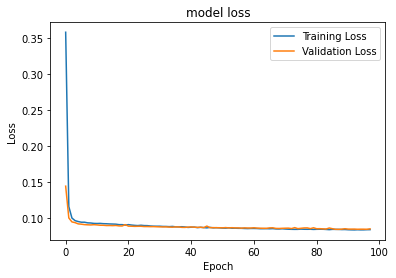

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       276
           1       0.95      0.97      0.96       190

    accuracy                           0.97       466
   macro avg       0.97      0.97      0.97       466
weighted avg       0.97      0.97      0.97       466

Accuracy: 0.9678111587982833
[[267   9]
 [  6 184]]
Precision: 0.9534
Recall: 0.9684
F1 Score: 0.9608
Epoch 1/100
131/131 [==============================] - 1s 3ms/step - loss: 0.2842 - accuracy: 0.8963 - val_loss: 0.1117 - val_accuracy: 0.9699
Epoch 2/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0997 - accuracy: 0.9692 - val_loss: 0.1028 - val_accuracy: 0.9699
Epoch 3/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0946 - accuracy: 0.9692 - val_loss: 0.1018 - val_accuracy: 0.9699
Epoch 4/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0934 - accuracy: 0.9682 - val_loss: 0.0996 

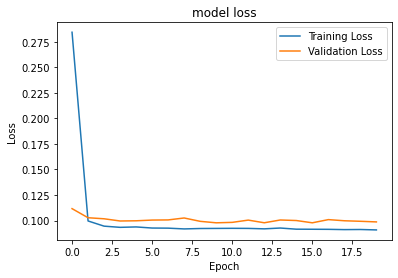

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       260
           1       0.95      0.98      0.97       205

    accuracy                           0.97       465
   macro avg       0.97      0.97      0.97       465
weighted avg       0.97      0.97      0.97       465

Accuracy: 0.9698924731182795
[[250  10]
 [  4 201]]
Precision: 0.9526
Recall: 0.9805
F1 Score: 0.9663
Epoch 1/100
131/131 [==============================] - 1s 3ms/step - loss: 0.2454 - accuracy: 0.9286 - val_loss: 0.1188 - val_accuracy: 0.9677
Epoch 2/100
131/131 [==============================] - 0s 2ms/step - loss: 0.1020 - accuracy: 0.9685 - val_loss: 0.1042 - val_accuracy: 0.9677
Epoch 3/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0980 - accuracy: 0.9694 - val_loss: 0.1025 - val_accuracy: 0.9656
Epoch 4/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0959 - accuracy: 0.9692 - val_loss: 0.0951 

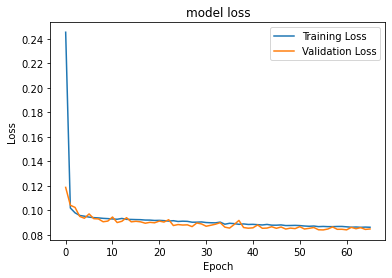

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       243
           1       0.98      0.97      0.98       222

    accuracy                           0.98       465
   macro avg       0.98      0.98      0.98       465
weighted avg       0.98      0.98      0.98       465

Accuracy: 0.9763440860215054
[[239   4]
 [  7 215]]
Precision: 0.9817
Recall: 0.9685
F1 Score: 0.9751
Epoch 1/100
131/131 [==============================] - 1s 3ms/step - loss: 0.2752 - accuracy: 0.9021 - val_loss: 0.1151 - val_accuracy: 0.9634
Epoch 2/100
131/131 [==============================] - 0s 2ms/step - loss: 0.1052 - accuracy: 0.9692 - val_loss: 0.1014 - val_accuracy: 0.9656
Epoch 3/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0997 - accuracy: 0.9694 - val_loss: 0.0966 - val_accuracy: 0.9656
Epoch 4/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0979 - accuracy: 0.9694 - val_loss: 0.0947 

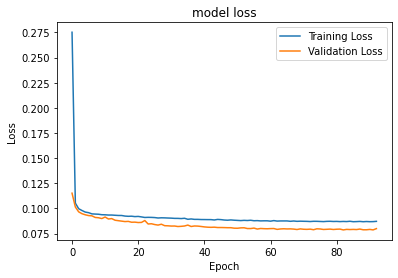

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       241
           1       0.97      0.98      0.98       224

    accuracy                           0.98       465
   macro avg       0.98      0.98      0.98       465
weighted avg       0.98      0.98      0.98       465

Accuracy: 0.9763440860215054
[[234   7]
 [  4 220]]
Precision: 0.9692
Recall: 0.9821
F1 Score: 0.9756
Epoch 1/100
131/131 [==============================] - 1s 3ms/step - loss: 0.2849 - accuracy: 0.9501 - val_loss: 0.0966 - val_accuracy: 0.9785
Epoch 2/100
131/131 [==============================] - 0s 2ms/step - loss: 0.1039 - accuracy: 0.9685 - val_loss: 0.0826 - val_accuracy: 0.9785
Epoch 3/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0988 - accuracy: 0.9682 - val_loss: 0.0803 - val_accuracy: 0.9785
Epoch 4/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0973 - accuracy: 0.9680 - val_loss: 0.0806 

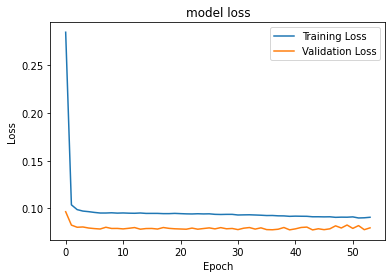

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       256
           1       0.99      0.97      0.98       209

    accuracy                           0.98       465
   macro avg       0.98      0.98      0.98       465
weighted avg       0.98      0.98      0.98       465

Accuracy: 0.9806451612903225
[[254   2]
 [  7 202]]
Precision: 0.9902
Recall: 0.9665
F1 Score: 0.9782
Epoch 1/100
131/131 [==============================] - 1s 3ms/step - loss: 0.3309 - accuracy: 0.8639 - val_loss: 0.1097 - val_accuracy: 0.9677
Epoch 2/100
131/131 [==============================] - 0s 2ms/step - loss: 0.1045 - accuracy: 0.9687 - val_loss: 0.0936 - val_accuracy: 0.9677
Epoch 3/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0968 - accuracy: 0.9687 - val_loss: 0.0935 - val_accuracy: 0.9699
Epoch 4/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0951 - accuracy: 0.9690 - val_loss: 0.0940 

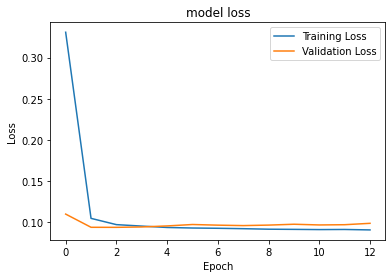

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       273
           1       0.96      0.98      0.97       192

    accuracy                           0.97       465
   macro avg       0.97      0.97      0.97       465
weighted avg       0.97      0.97      0.97       465

Accuracy: 0.9741935483870968
[[265   8]
 [  4 188]]
Precision: 0.9592
Recall: 0.9792
F1 Score: 0.9691
Epoch 1/100
131/131 [==============================] - 1s 3ms/step - loss: 0.2882 - accuracy: 0.9188 - val_loss: 0.1112 - val_accuracy: 0.9677
Epoch 2/100
131/131 [==============================] - 0s 2ms/step - loss: 0.1057 - accuracy: 0.9699 - val_loss: 0.0963 - val_accuracy: 0.9699
Epoch 3/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0990 - accuracy: 0.9692 - val_loss: 0.0972 - val_accuracy: 0.9720
Epoch 4/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0970 - accuracy: 0.9692 - val_loss: 0.0990 

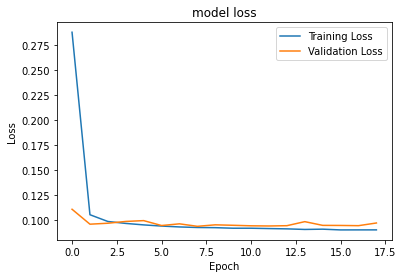

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       256
           1       0.95      0.98      0.97       209

    accuracy                           0.97       465
   macro avg       0.97      0.97      0.97       465
weighted avg       0.97      0.97      0.97       465

Accuracy: 0.9698924731182795
[[246  10]
 [  4 205]]
Precision: 0.9535
Recall: 0.9809
F1 Score: 0.9670
Epoch 1/100
131/131 [==============================] - 1s 3ms/step - loss: 0.2356 - accuracy: 0.9475 - val_loss: 0.1034 - val_accuracy: 0.9634
Epoch 2/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0976 - accuracy: 0.9699 - val_loss: 0.0946 - val_accuracy: 0.9677
Epoch 3/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0951 - accuracy: 0.9687 - val_loss: 0.0929 - val_accuracy: 0.9634
Epoch 4/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0946 - accuracy: 0.9692 - val_loss: 0.0913 

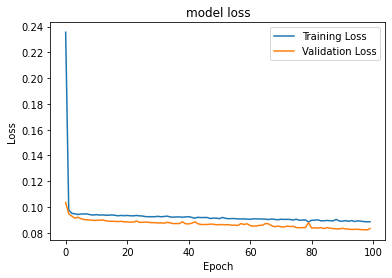

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       260
           1       0.95      0.97      0.96       205

    accuracy                           0.97       465
   macro avg       0.96      0.97      0.97       465
weighted avg       0.97      0.97      0.97       465

Accuracy: 0.9655913978494624
[[250  10]
 [  6 199]]
Precision: 0.9522
Recall: 0.9707
F1 Score: 0.9614
Epoch 1/100
131/131 [==============================] - 1s 3ms/step - loss: 0.3009 - accuracy: 0.9143 - val_loss: 0.1448 - val_accuracy: 0.9656
Epoch 2/100
131/131 [==============================] - 0s 2ms/step - loss: 0.1118 - accuracy: 0.9690 - val_loss: 0.1170 - val_accuracy: 0.9656
Epoch 3/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0992 - accuracy: 0.9692 - val_loss: 0.1108 - val_accuracy: 0.9656
Epoch 4/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0956 - accuracy: 0.9692 - val_loss: 0.1084 

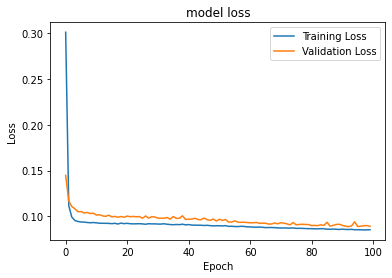

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       276
           1       0.97      0.96      0.97       189

    accuracy                           0.97       465
   macro avg       0.97      0.97      0.97       465
weighted avg       0.97      0.97      0.97       465

Accuracy: 0.9720430107526882
[[270   6]
 [  7 182]]
Precision: 0.9681
Recall: 0.9630
F1 Score: 0.9655
Average Validation Accuracy: 0.9716276708662145


In [9]:
from sklearn.model_selection import KFold
import tensorflow as tf

optimizer1=tf.keras.optimizers.Adam(learning_rate=0.0005)


from keras.callbacks import EarlyStopping
#set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=10)
n_split = 10
acc = 0
kf = KFold(n_split, random_state=10, shuffle=True)
for train, val in kf.split(x, y):
  val_acc = model_aa(x[train], x[val], y[train], y[val], optimizer1, early_stopping_monitor)
  acc = acc + val_acc

print("Average Validation Accuracy:",acc/n_split)

